In [17]:
!pip install numpy matplotlib opencv-python scikit-learn

In [18]:
#  STEP 1: Import required libraries
import os
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#  STEP 2: Unzip the dataset (if not yet unzipped)
# Make sure dogs-vs-cats.zip is in the same folder as this notebook
with zipfile.ZipFile("/content/drive/MyDrive/dogs-vs-cats.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

print("Dataset unzipped.")

Dataset unzipped.


In [19]:
from zipfile import ZipFile

train = "/content/train.zip"

with ZipFile(train, 'r') as zip:
  zip.extractall()
  print('The data train set is extracted')

The data train set is extracted


In [20]:
from zipfile import ZipFile

test = "/content/test1.zip"

with ZipFile(test, 'r') as zip:
  zip.extractall()
  print('The test data  is extracted')

The test data  is extracted


In [21]:
import os, cv2, numpy as np
from pathlib import Path

image_dir = Path("/content/train")  # folder with mixed cat+dog images
X, y = [], []
IMG_SIZE = 64
MAX_TOTAL = 2000  # or any cap to keep RAM low
valid_exts = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

count = 0
for f in image_dir.rglob("*"):
    if f.suffix.lower() not in valid_exts:
        continue
    name = f.stem.lower()
    if "cat" in name:
        label = 0
    elif "dog" in name:
        label = 1
    else:
        continue  # skip if we can't infer class

    try:
        img = cv2.imread(str(f))
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img.flatten())
        y.append(label)
        count += 1
        if count >= MAX_TOTAL:
            break
    except Exception:
        pass

X = np.array(X)
y = np.array(y)
print(f" Processed {len(X)} images with shape {X.shape}")
print("Label mapping: 0=cat, 1=dog")


 Processed 2000 images with shape (2000, 12288)
Label mapping: 0=cat, 1=dog


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape, X_test.shape)

(1600, 12288) (400, 12288)


In [23]:
#  STEP 5: Train SVM model
svm = SVC(kernel='linear', random_state=42)
print(" Training SVM (this can take a few minutes)...")
svm.fit(X_train, y_train)
print(" SVM training complete.")

 Training SVM (this can take a few minutes)...
 SVM training complete.


In [24]:
#  STEP 6: Evaluate the model
y_pred = svm.predict(X_test)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print(" Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")


 Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       197
           1       0.55      0.50      0.52       203

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.54      0.54      0.54       400

 Accuracy: 53.75 %


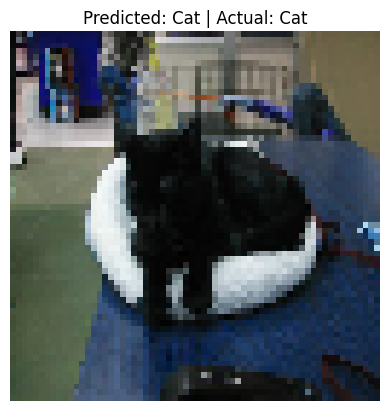

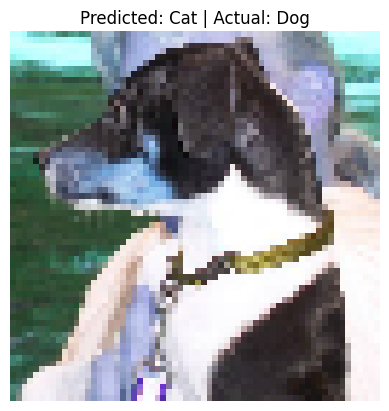

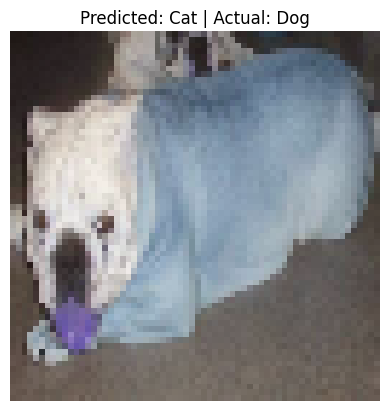

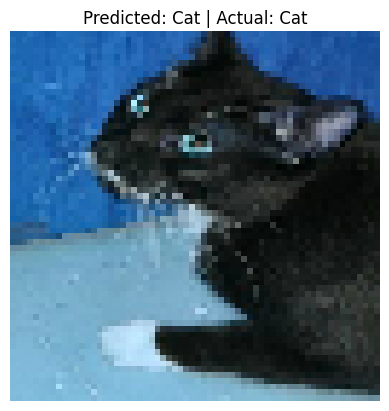

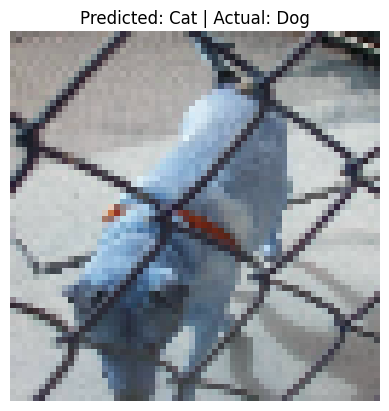

In [25]:
# Make sure you define label names
categories = ['Cat', 'Dog']
IMG_SIZE = 64  # size used during training

# Display 5 random predictions
for i in range(5):
    idx = np.random.randint(len(X_test))

    img_flat = X_test[idx]
    img = img_flat.reshape(IMG_SIZE, IMG_SIZE, 3)

    pred = svm.predict([img_flat])[0]
    actual = y_test[idx]

    plt.imshow(img.astype(np.uint8))
    plt.title(f"Predicted: {categories[pred]} | Actual: {categories[actual]}")
    plt.axis("off")
    plt.show()
